### GRIP : The Spark Foundation - INTERNSHIP November-2021

### Data Science and Business Analytics Intern

##### Author : Abhishek Chakraborty

##### TASK 5 : Create the object detection model which identifies the classes of the object in an image

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (4032, 3024, 3)


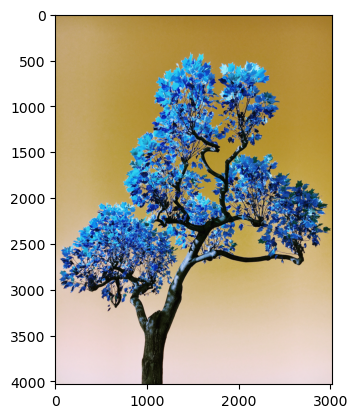

In [58]:
image = cv2.imread('/Users/draculalemon/Downloads/tree.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

The color of the image looks a bit off, this is because

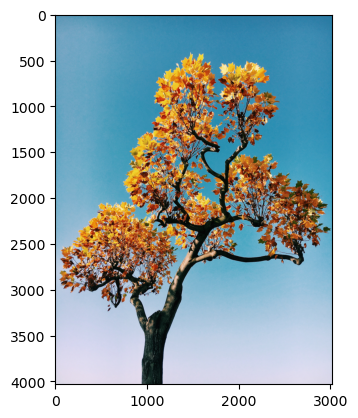

In [65]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# COLOR IDENTIFICATION

##### RGB TO HEX CONVERSION

We will first define a function that will convert RGB to HEX!


A hex color code is a 6-symbol code made of up to three 2-symbol elements. Each of the 2-symbol elements expresses a color value from 0 to 255. The code is written using a formula that turns each value into a unique 2-digit alphanumeric code. For example, the RGB code (224, 105, 16) is E06910 in hexadecimal code

In [60]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [61]:
#read image in RGB color space
#we will define a method that will help us get an image into python in rgb 
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [62]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 58.28648596, 143.65265501, 178.82465789]),
 array([121.81282024, 111.52086165, 105.78845551]),
 array([152.21085706, 189.47039673, 211.9375    ]),
 array([34.68237313, 29.61774945, 21.16126502]),
 array([155.73895664,  73.7949198 ,  29.50594545]),
 array([103.1184881 , 166.74208432, 194.19271427]),
 array([220.32890889, 159.83616423,  59.65714286]),
 array([204.89063323, 211.6135166 , 230.60506324])]

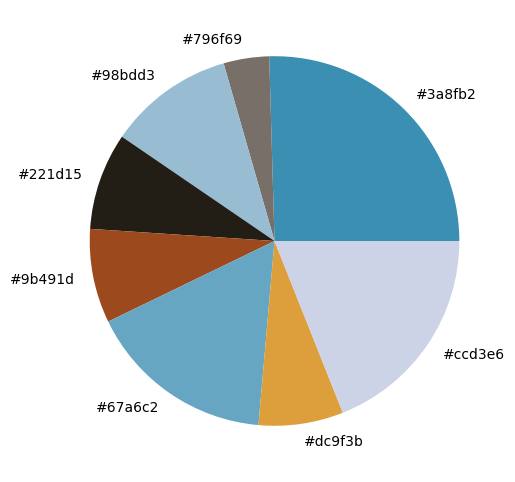

In [63]:
get_colors(get_image('/Users/draculalemon/Downloads/tree.jpg'), 8, True)